# Usage of the plot tool in the nmrToolsLab package

## 1. General Information
This notebook showcases the use of the plotting tool to plot NMR spectra. This tool creates a single plot with a user defined spectrum that can be added into more complex multipanel figures. It does work for 1D and 2D spectrum for any nuclei. 

The spectra will be plotted as they are in TopSpin so please make sure the processing is correct in TopSpin before plotting spectra.

## 2. Prepare Script
Load matplotlib and plot_nmr_spectra.

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import nmrtoolslab.plot_nmr_spectra as plot_nmr_spectra

## 3. Example for a single plot

Information regarding the data
* "data_path": path to the data
* "dataset": folder that contains the data
* "expno": expno of the experiment
* "procno": procno of the experiment

Information regarding the plot and spectra
* "lowest_contour": first contour to be plotted
* "contour factor":
* "n_contour": number of contours
* "linewidth": linewidth of the peaks 


In [2]:
data_path = '.'
dataset = 'data'
expno_1D = '1004'
expno_2D = '1005'
procno = '1'

Load the NMR data for a 1D spectrum

In [4]:
data_1D, udic_1D = plot_nmr_spectra.read_topspin_data(
            data_path, 
            dataset, 
            str(expno_1D), 
            procno)

Or a 2D spectrum

In [9]:
data_2D, udic_2D = plot_nmr_spectra.read_topspin_data(
            data_path, 
            dataset, 
            str(expno_2D), 
            procno)

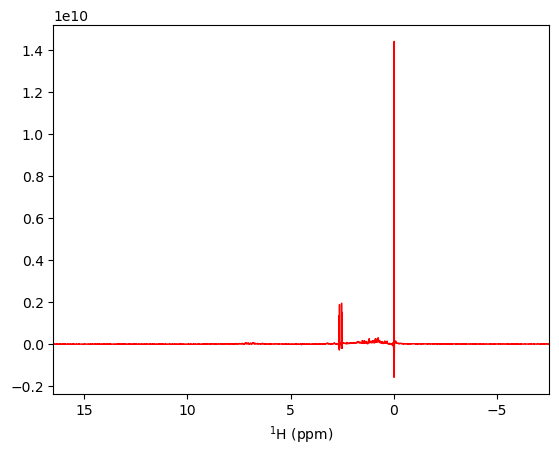

In [7]:

test_1d = plot_nmr_spectra.plot_nmr_spectra(
            data_1D,
            udic_1D,            
            lowest_contour = 9e8,
            contour_factor = 1.8,
            n_contour = 20, 
            linewitdh_plot = 1
            )
plt.show()

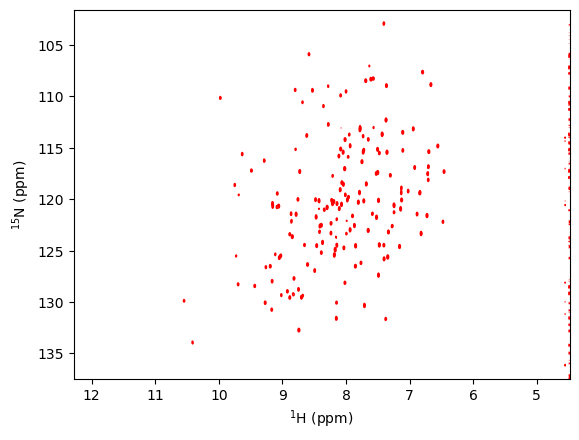

In [11]:
test_2d = plot_nmr_spectra.plot_nmr_spectra(
            data_2D,
            udic_2D,
            lowest_contour = 9e8,
            contour_factor = 1.8,
            n_contour = 20, 
            linewitdh_plot = 1
            )
plt.show()

Additionnal information
* "spec_lim": spectral limits that needs to plotted. If nothing is used then the complete SW is shown
* "plot_color": color of the plot. Red is the default

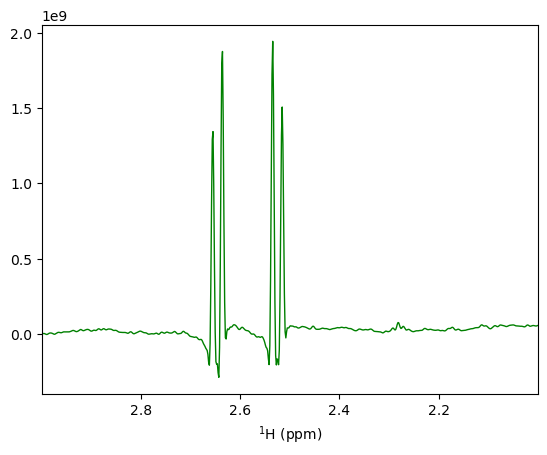

In [13]:
test_1d = plot_nmr_spectra.plot_nmr_spectra(
            data_1D, 
            udic_1D, 
            lowest_contour = 9e8,
            contour_factor = 1.3,
            n_contour = 20, 
            linewitdh_plot = 1,
            spec_lim=[[3,2]],
            plot_color= 'green',
            )
plt.show()

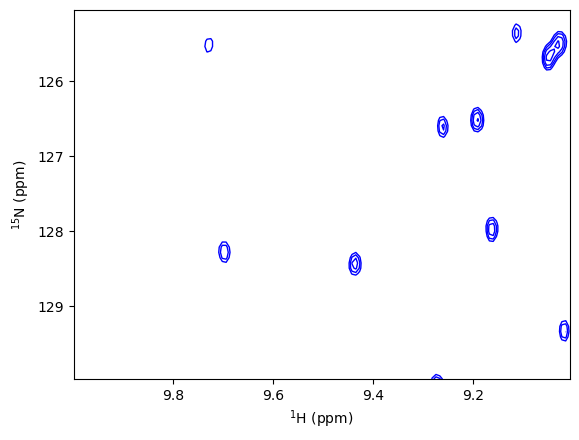

In [14]:
test_2d = plot_nmr_spectra.plot_nmr_spectra(
            data_2D, 
            udic_2D, 
            lowest_contour = 9e8,
            contour_factor = 1.3,
            n_contour = 20, 
            linewitdh_plot = 1,
            spec_lim=[[125,130],[10,9]],
            plot_color= 'blue',
            )
plt.show()

## 4. Example for mutliple specta 

### 4.1 Overlay of the 2 spectra in a single figure


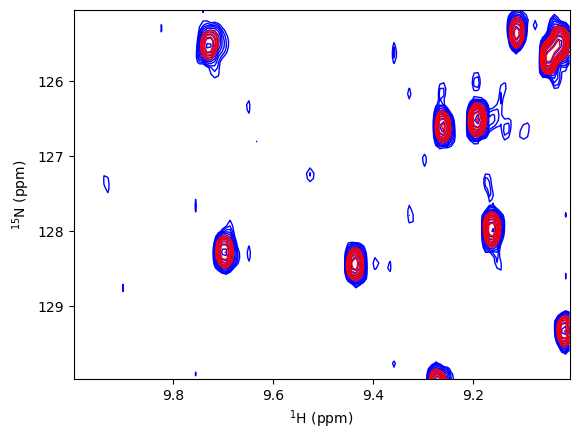

In [15]:
fig, ax = plt.subplots(1, 1)

for i, (data, color, low_ct) in enumerate([
    (expno_2D, 'b', 1e8),
    (expno_2D, 'r', 4e8)
    ]):
    plot_nmr_spectra.plot_nmr_spectra(
                data_2D,
                udic_2D,
                lowest_contour = low_ct,
                contour_factor = 1.3,
                n_contour = 20, 
                linewitdh_plot = 1,
                spec_lim=[[125,130],[10,9]],
                plot_color= color,
                plot_name = ax
                )


### 4.2 Multi-Panel figure

To assign the figure to a given panel, the option "plot_name" is used. 

First the mutiplanel figure has to be created using subplots for instance. In the example below a figure with 1 row and 2 columns is created and belongs to the object ax. We can refer to ax[0] and ax[1] after their creation. 

Using a loop ax[0] and ax[1] can be filled with the plot of the nmr spectrum

IndexError: list index out of range

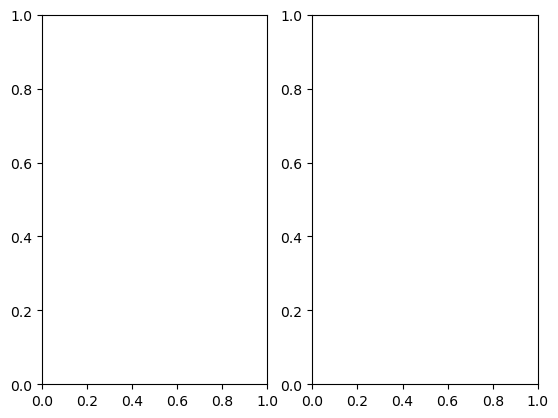

In [16]:
n_row = 1
n_col = 2

fig, ax = plt.subplots(n_row, n_col)

for k, (data, spec_lim) in enumerate([
    (expno_1D,[[3,2]]),
    (expno_2D,None)
    ]):
    plot_nmr_spectra.plot_nmr_spectra(
                data_2D,
                udic_2D,
                lowest_contour = 9e8,
                contour_factor = 1.3,
                n_contour = 20, 
                linewitdh_plot = 1,
                spec_lim=spec_lim,
                plot_color= 'blue',
                plot_name = ax[k]
                )
plt.subplots_adjust(left=0.1, right=0.97, top=0.9, bottom=0.3,wspace=0.3)



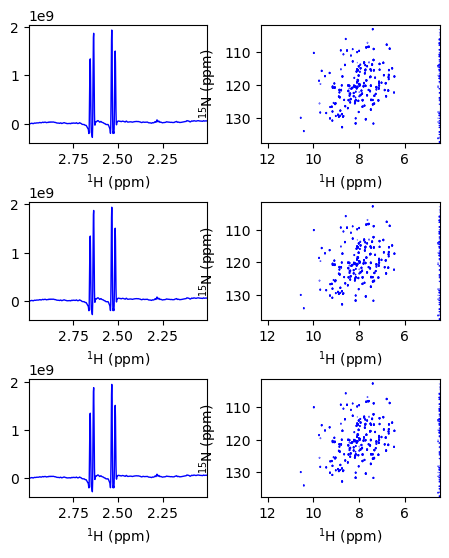

In [13]:
n_row = 3
n_col = 2

fig, ax = plt.subplots(n_row, n_col,figsize=plot_nmr_spectra.cm2inch((12,20)))

for r in range(n_row):
    for k, (data, spec_lim) in enumerate([
        (expno_1D,[[3,2]]),
        (expno_2D,None)
        ]):
        plot_nmr_spectra.read_topspin_data(
                    data_path, 
                    dataset, 
                    str(data), 
                    procno,
                    lowest_contour = 9e8,
                    contour_factor = 1.3,
                    n_contour = 20, 
                    linewitdh_plot = 1,
                    spec_lim=spec_lim,
                    plot_color= 'blue',
                    plot_name = ax[r,k]
                    )
plt.subplots_adjust(left=0.1, right=0.97, top=0.9, bottom=0.3,wspace=0.3,hspace=0.5)
